## Assignment - Linear Regression
### Year 2018-2019  - Semester II
### CCE3502
#### Devloped by - Adrian Muscat, 2019
---
# Write Your NAME, ID and CLASS here
# e.g Matthew Vella, 428698M, BSc CS, Yr II

In [11]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# this line plots graphs in line
%matplotlib inline

## Generate some example data as in the notes
## i.e y = sin(2.pi.theta) + gaussian noise

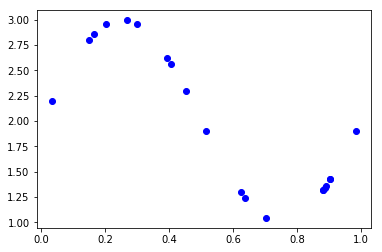

In [12]:
N=20
np.random.seed(2019)
x=np.random.rand(N)
y = np.sin(2*np.pi*x)+2.0+np.random.randn(N)*.00001
plt.plot(x,y,'bo')
plt.show()


## Graded Questions start here

In [13]:
# DO NOT MODIFY THIS CELL
# This function generates a datset of size N
# Returns two vectors (X,Y), where X is the feature vector, Y are the real labels
def get_data(N):
    max_x=1.0
    np.random.seed(4)
    data_xx=np.random.rand(N)*max_x
    xx=np.array(max_x-data_xx)
    data_yy = np.sin(np.pi*xx**3.5)+np.random.randn(N)*.07
    return data_xx,data_yy

## Generate a dataset of size N=20 and generate a plot of Y vs X 

[0.96702984 0.54723225 0.97268436 0.71481599 0.69772882 0.2160895
 0.97627445 0.00623026 0.25298236 0.43479153 0.77938292 0.19768507
 0.86299324 0.98340068 0.16384224 0.59733394 0.0089861  0.38657128
 0.04416006 0.95665297]
[ 0.04332732  0.18879125  0.02976565  0.0621603  -0.03329302  0.99803865
 -0.04247565  0.17620961  0.95585491  0.41688163 -0.05296528  0.99691618
  0.01418302 -0.08462452  1.14974174  0.15738748  0.21601209  0.46002375
  0.55786835 -0.09521432]


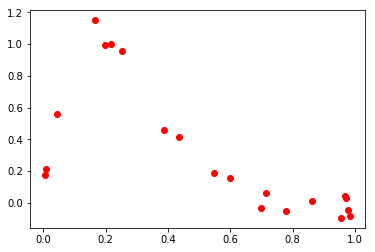

In [14]:
# First dataset
data_xx, data_yy=get_data(20)
print data_xx
print data_yy
plt.plot(data_xx,data_yy,'ro')
plt.show()

## Split dataset into train and test using below cell

In [15]:
# DO NOT MODIFY THIS CELL, except for N below
# Split the dataset 
# Allocate the first 2/3 to training 
# Allocate the rest to testing
N = 20   # MODIFY THIS LINE WHEN YOU CHANGE N
train_test_split = int(N*2.0/3.0)
xx_train = data_xx[0:train_test_split].reshape(-1, 1)
yy_train = data_yy[0:train_test_split].reshape(-1, 1)
xx_test = data_xx[train_test_split:].reshape(-1, 1)
yy_test = data_yy[train_test_split:].reshape(-1, 1)

## 1. Calculate the weights for various polynomial degrees (1 - 20). Plot the train error and test error versus polynomial dimension [20 marks]

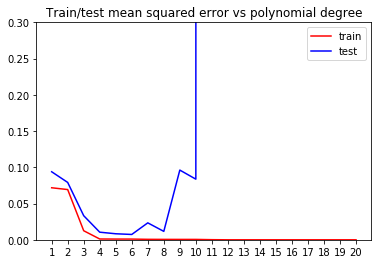

In [16]:
lr = LinearRegression(fit_intercept = False) # PolynomialFeatures includes intercept

degrees = []
train_error_hist = []
test_error_hist = []
for i in range(1, 20 + 1):
    degrees.append(i)
    
    poly = PolynomialFeatures(i)
    X_train = poly.fit_transform(xx_train)
    X_test = poly.fit_transform(xx_test)
    lr.fit(X_train, yy_train)
    
    train_error = mean_squared_error(yy_train, lr.predict(X_train))
    test_error = mean_squared_error(yy_test, lr.predict(X_test))
    
    train_error_hist.append(train_error)
    test_error_hist.append(test_error)
    
plt.plot(degrees, train_error_hist, c="red", label="train")
plt.plot(degrees, test_error_hist, c="blue", label="test")
plt.ylim([0, 0.3])
plt.xticks(degrees)
plt.legend()
plt.title("Train/test mean squared error vs polynomial degree")
plt.show()

## 2. Which polynomial generalizes well? Produce a scatter plot for the whole dataset and superimpose the chosen polynomial on the same graph. [10 marks]

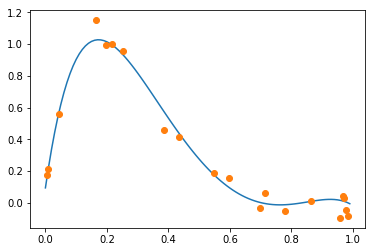

In [17]:
# Polynomial of degree 6 gives the smallest testing error
poly = PolynomialFeatures(6)
X_train = poly.fit_transform(xx_train)
lr.fit(X_train, yy_train)

X = np.arange(0, 1, 0.01).reshape(-1, 1)
X_poly = poly.fit_transform(X)
y_pred = lr.predict(X_poly)
plt.plot(X, y_pred)

plt.plot(data_xx, data_yy, 'o')
plt.plot()
plt.show()

## 3. Train a polynomial of degree M=20. Visualise the dataset as a scatter plot and the  polynomial (M=12)  on the same graph. Comment on the graph. [10 marks]

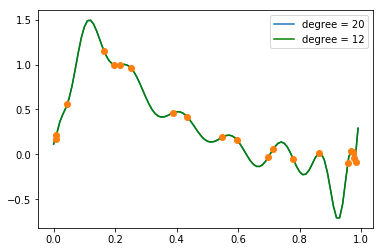

In [18]:
# Polynomial of degree M=20
poly = PolynomialFeatures(20)
X_train = poly.fit_transform(data_xx.reshape(-1, 1))
lr.fit(X_train, data_yy.reshape(-1, 1))

X = np.arange(0, 1, 0.01).reshape(-1, 1)
X_poly = poly.fit_transform(X)
y_pred = lr.predict(X_poly)
plt.plot(X, y_pred, label="degree = 20")

# Polynomial of degree M=20
poly = PolynomialFeatures(20)
X_train = poly.fit_transform(data_xx.reshape(-1, 1))
lr.fit(X_train, data_yy.reshape(-1, 1))

X = np.arange(0, 1, 0.01).reshape(-1, 1)
X_poly = poly.fit_transform(X)
y_pred = lr.predict(X_poly)
plt.plot(X, y_pred, color="green", label="degree = 12")


plt.plot(data_xx, data_yy, 'o')
plt.legend()
plt.show()

From the graph we see that polynomial with degree=20 fits the data ideally, but we can also notice that its variability is pretty high. On the other hand, polynomial with degree=12 does not fully fit the data, but its generalization power is bettter.

## 4. How can you Regularize the model (M=20) [10 marks]


To regularize the model we will include coefficients to our objective function, which we are trying to minimize. This means that large coefficients will be reduced significantly. We will show models with alpha=1e-9, 1e-3, 1

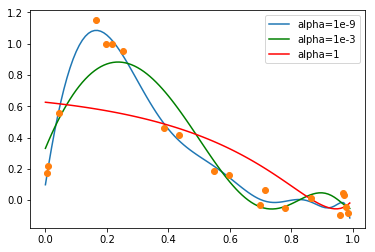

In [19]:
# aplha = 1e-9
lr_ridge = Ridge(alpha=1e-9)

poly = PolynomialFeatures(20)
X_train = poly.fit_transform(data_xx.reshape(-1, 1))
lr_ridge.fit(X_train, data_yy.reshape(-1, 1))

X = np.arange(0, 1, 0.01).reshape(-1, 1)
X_poly = poly.fit_transform(X)
y_pred = lr_ridge.predict(X_poly)
plt.plot(X, y_pred, label="alpha=1e-9")

# aplha = 1e-3
lr_ridge = Ridge(alpha=1e-3)

poly = PolynomialFeatures(20)
X_train = poly.fit_transform(data_xx.reshape(-1, 1))
lr_ridge.fit(X_train, data_yy.reshape(-1, 1))

X = np.arange(0, 1, 0.01).reshape(-1, 1)
X_poly = poly.fit_transform(X)
y_pred = lr_ridge.predict(X_poly)
plt.plot(X, y_pred, color="green", label="alpha=1e-3")

# aplha = 1
lr_ridge = Ridge(alpha=1)

poly = PolynomialFeatures(20)
X_train = poly.fit_transform(data_xx.reshape(-1, 1))
lr_ridge.fit(X_train, data_yy.reshape(-1, 1))

X = np.arange(0, 1, 0.01).reshape(-1, 1)
X_poly = poly.fit_transform(X)
y_pred = lr_ridge.predict(X_poly)
plt.plot(X, y_pred, color="red", label="alpha=1")


plt.plot(data_xx, data_yy, 'o')
plt.legend()
plt.show()